In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense, Dropout

In [ ]:
df = pd.read_csv("flood.csv")
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,5,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,6,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,2,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,9,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,7,7,6,5,3,3,4,4,3,4,0.475


In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.drop('FloodProbability', axis=1).values
y = df['FloodProbability'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
875/875 [==============================] - 3s 2ms/step - loss: 0.6933 - accuracy: 0.0000e+00 - val_loss: 0.6903 - val_accuracy: 0.0000e+00
Epoch 2/5
875/875 [==============================] - 2s 2ms/step - loss: 0.6902 - accuracy: 0.0000e+00 - val_loss: 0.6895 - val_accuracy: 0.0000e+00
Epoch 3/5
875/875 [==============================] - 2s 2ms/step - loss: 0.6898 - accuracy: 0.0000e+00 - val_loss: 0.6891 - val_accuracy: 0.0000e+00
Epoch 4/5
875/875 [==============================] - 2s 2ms/step - loss: 0.6895 - accuracy: 0.0000e+00 - val_loss: 0.6889 - val_accuracy: 0.0000e+00
Epoch 5/5
875/875 [==============================] - 2s 2ms/step - loss: 0.6893 - accuracy: 0.0000e+00 - val_loss: 0.6888 - val_accuracy: 0.0000e+00


469/469 [==============================] - 1s 1ms/step - loss: 0.6887 - accuracy: 0.0000e+00
Test Accuracy: 0.00%


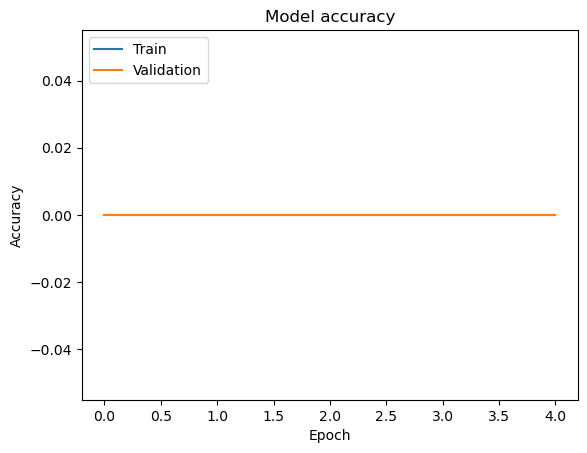

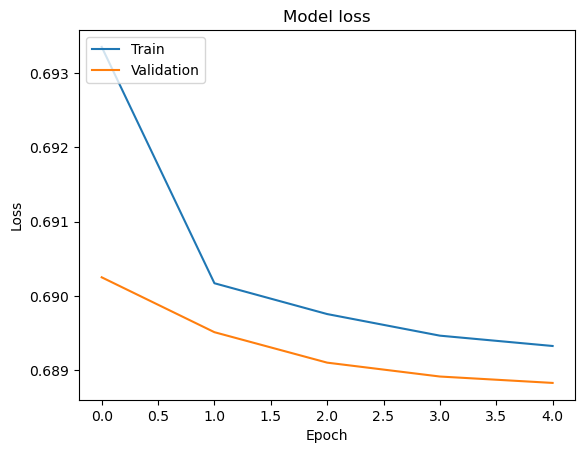

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Plotting training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Predict probabilities on the test set
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary classification (if needed)
y_pred = (y_pred_prob > 0.5).astype(int)

# Example: Print predicted probabilities and corresponding actual values
for i in range(10):
    print(f"Predicted Probability: {y_pred_prob[i][0]:.4f}, Actual: {y_test[i]}")

469/469 [==============================] - 1s 1ms/step
Predicted Probability: 0.4660, Actual: 0.455
Predicted Probability: 0.5002, Actual: 0.495
Predicted Probability: 0.4794, Actual: 0.47
Predicted Probability: 0.4711, Actual: 0.46
Predicted Probability: 0.4778, Actual: 0.465
Predicted Probability: 0.5255, Actual: 0.535
Predicted Probability: 0.4872, Actual: 0.49
Predicted Probability: 0.4844, Actual: 0.48
Predicted Probability: 0.5606, Actual: 0.605
Predicted Probability: 0.4869, Actual: 0.49


In [ ]:
model.save("model.h5")

c:\Users\Kannu Priya\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

model = load_model("model.h5")

In [ ]:
X_scaled.shape

(50000, 20)

In [ ]:
import random
x = random.randint(0, 49999)
x

22258

In [ ]:
x1 = random.randint(0, 49999)
x1

47390

In [ ]:
test = pd.concat([df.loc[x], df.loc[x1]], axis=1)
type(test)

pandas.core.frame.DataFrame

In [ ]:
test

,22258,47390
MonsoonIntensity,3.00,4.00
TopographyDrainage,8.00,4.00
RiverManagement,4.00,7.00
Deforestation,5.00,4.00
Urbanization,5.00,5.00
ClimateChange,8.00,4.00
DamsQuality,5.00,2.00
Siltation,5.00,8.00
AgriculturalPractices,4.00,3.00
Encroachments,6.00,3.00


In [ ]:
tst = test.transpose()
tst

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
22258,3.0,8.0,4.0,5.0,5.0,8.0,5.0,5.0,4.0,6.0,7.0,4.0,6.0,6.0,5.0,4.0,9.0,6.0,6.0,8.0,0.57
47390,4.0,4.0,7.0,4.0,5.0,4.0,2.0,8.0,3.0,3.0,3.0,5.0,4.0,7.0,3.0,5.0,5.0,4.0,4.0,4.0,0.44


In [ ]:
y = tst["FloodProbability"]
tst = tst.drop(["FloodProbability"], axis=1)
x_sc = scaler.fit_transform(tst)

In [ ]:
x_sc.shape

(2, 20)

In [ ]:
pred = model.predict(x_sc)
for i in pred:
    if i>0.5:
        print("Flood Warning")
    else:
        print("Safe")

1/1 [==============================] - 0s 26ms/step
Flood Warning
Safe
